In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\Downloadd\price.csv")
df=df.iloc[:,0:6]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,1.053000e+03,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,5.203841e+05,3.344729,2.045584,2042.619183,14995.946819,1.443495
std,3.395900e+05,0.846522,0.718566,880.733759,30017.121596,0.514881
min,8.000000e+04,0.000000,0.000000,380.000000,649.000000,1.000000
25%,3.100000e+05,3.000000,1.500000,1410.000000,5438.000000,1.000000
50%,4.350000e+05,3.000000,2.000000,1900.000000,8030.000000,1.000000
75%,6.280000e+05,4.000000,2.500000,2450.000000,11340.000000,2.000000
max,3.080000e+06,7.000000,5.000000,6070.000000,315374.000000,3.500000


* Correlation Matrix

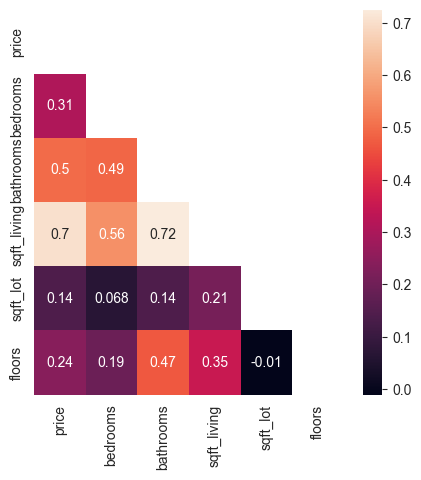

In [7]:
plt.figure(figsize=(5,5))
sns.set_style('white')
mask=np.zeros_like(df.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(),annot=True,mask=mask)
plt.show(sns)

In [16]:
x=df[['sqft_living']]
y=df[['price']]

* Linearity

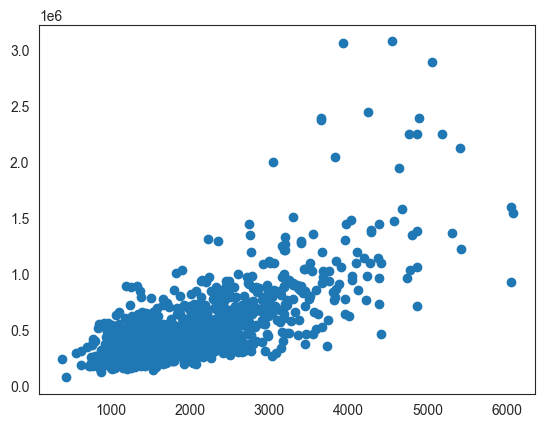

In [10]:
plt.scatter(x,y)

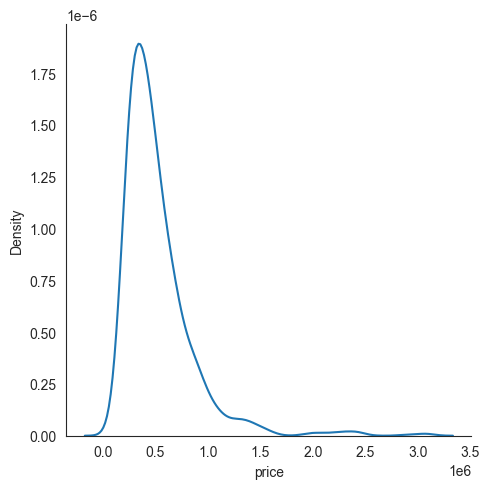

In [11]:
sns.displot(y,kind='kde')

# Simple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error,r2_score

model=LR()
model.fit(x,y)

print('Inrecept:',model.intercept_)
print('coefficient:',model.coef_)

y_predict=model.predict(x)
residual=y-y_predict

print('RMSE:',np.sqrt(mean_squared_error(y,y_predict)))
print('r2_score:',r2_score(y,y_predict))
print('model_score:',model.score(x,y))


Inrecept: [-34634.8057067]
coefficient: [[271.71920881]]
RMSE: 240823.3772465321
r2_score: 0.49661528229119023
model_score: 0.49661528229119023


In [29]:
import statsmodels.api as sm
x1=df[['sqft_living']]
x=sm.add_constant(x)
mod=sm.OLS(y,x).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1037.
Date:                Tue, 16 May 2023   Prob (F-statistic):          7.78e-159
Time:                        21:06:04   Log-Likelihood:                -14543.
No. Observations:                1053   AIC:                         2.909e+04
Df Residuals:                    1051   BIC:                         2.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.463e+04   1.88e+04     -1.845      0.065   -7.15e+04    2194.144
sqft_living   271.7192      8.438     32.200      0.000     255.161     288.277
==============================================================================
Omnibus:                      622.151   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.999
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      17.001   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Fitting of Regression Line

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sqft_living', ylabel='price'>

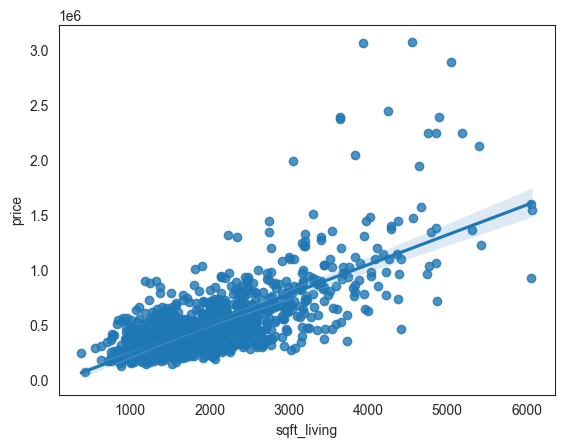

In [35]:
sns.regplot(df.sqft_living ,df.price,ci=95 )

* C.I. for regression coefficients

In [36]:
mod.conf_int()

,0,1
const,-71463.755348,2194.143934
sqft_living,255.161224,288.277193


* Normality of Residuals

Shapiro-Wilk Test Statistic 0.8456851840019226
p_value 8.53293606211052e-31


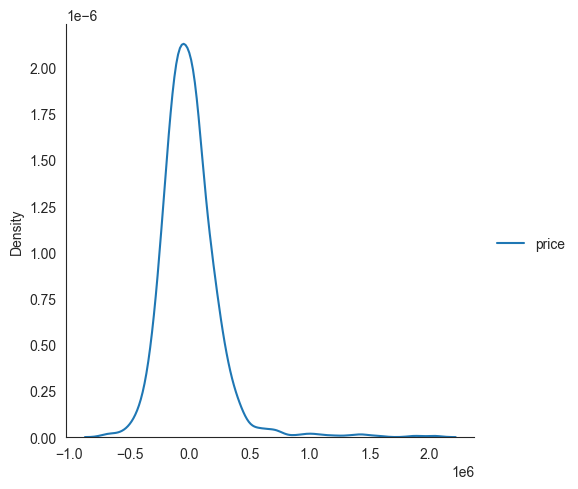

In [39]:
from scipy.stats import shapiro
stat,p_value=shapiro(residual)
print('Shapiro-Wilk Test Statistic',stat)
print('p_value',p_value)

sns.displot(residual,kind='kde')

* Homogenity

LeveneResult(statistic=5.320653709136387, pvalue=0.021170824462411923)


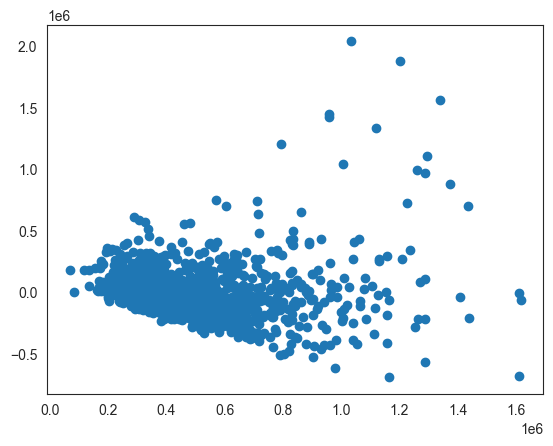

In [45]:
res=np.array(residual).flatten()
y_pred=np.array(y_predict).flatten()

import scipy.stats as stats
print(stats.levene(res,y_pred))

plt.scatter(y_pred,res)

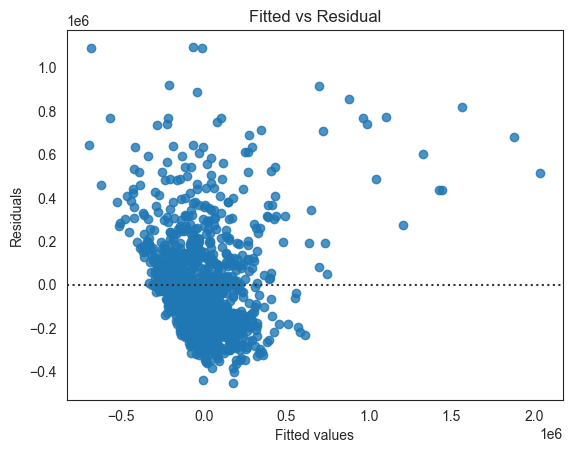

In [49]:
sns.residplot(res,y_pred)
plt.title('Fitted vs Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show(sns)

* Autocorrelation

[2.02255627]


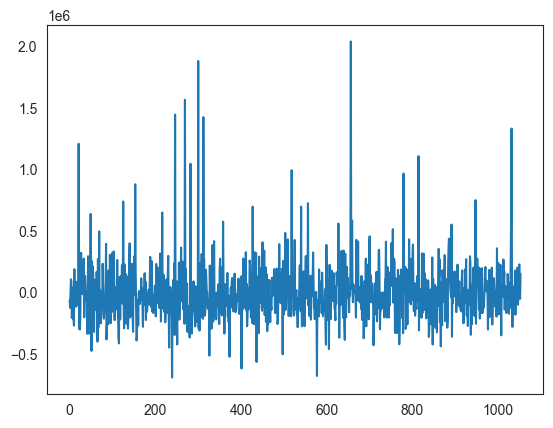

In [51]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residual))

plt.plot(residual)

* ANOVA

In [52]:
import statsmodels.api as sm
import statsmodels.stats as stats
from statsmodels.formula.api import ols
anova=ols('sqft_living ~ price',data=df).fit()
sm.stats.anova_lm(anova)

,df,sum_sq,mean_sq,F,PR(>F)
price,1.0,4.052519e+08,4.052519e+08,1036.866324,7.781661e-159
Residual,1051.0,4.107760e+08,3.908430e+05,NaN,NaN
